In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

### Tests_

#### [1. Normality Tests](#1_Normality_Tests)
1. Shapiro-Wilk Test
2. D’Agostino’s K^2 Test
3. Anderson-Darling Test

#### [2. Correlation Tests](#2_Correlation_Tests)
1. Pearson’s Correlation Coefficient
2. Spearman’s Rank Correlation
3. Kendall’s Rank Correlation
4. Chi-Squared Test
5. [Contingency tables](#Contingency_tables)

#### [3. Stationary Tests](#3_Stationary_Tests)
1. Augmented Dickey-Fuller
2. Kwiatkowski-Phillips-Schmidt-Shin

#### [4. Parametric Statistical Hypothesis Tests](#4_Parametric_Tests)
1. Student’s t-test
2. Paired Student’s t-test
3. Analysis of Variance Test (ANOVA)
4. Repeated Measures ANOVA Test

#### [5. Nonparametric Statistical Hypothesis Tests](#5_Nonparametric_Tests)
1. Mann-Whitney U Test
2. Wilcoxon Signed-Rank Test
3. Kruskal-Wallis H Test
4. Friedman Test

#### [6. Power analysis](#6_Power_analysis)

#### [7. Heteroscedasticity](#7_Heteroscedasticity)

#### Q-Q plot

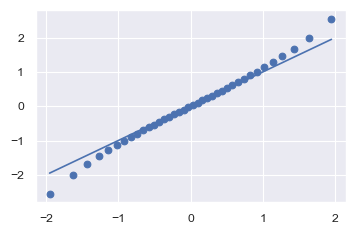

In [12]:
# Q-Q plot norm-t(df)
df = 5
x = np.linspace(0, 1, 40)
# quantile
y1 = st.norm.ppf(x)
# ppf - percent-point function, inverse to cdf
# ppf - probit or quantile function
y2 = st.t.ppf(x,df)
plt.scatter(y1, y2)
plt.plot(y1, y1)
plt.show()

### 1_Normality_Tests
[Top](#Tests_)

If Data Is Gaussian:
    Use Parametric Statistical Methods
Else:
    Use Nonparametric Statistical Methods

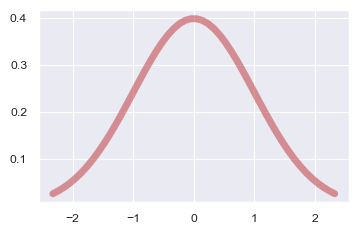

In [13]:
x = np.linspace(st.norm.ppf(0.01),
                st.norm.ppf(0.99), 50)
plt.plot(x, st.norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf');

#### 1. Shapiro-Wilk Test
#### 2. D’Agostino’s K^2 Test
#### 3. Anderson-Darling Test
Tests whether a data sample has a Gaussian distribution.

Assumptions
* Observations in each sample are independent and identically distributed (iid).

Interpretation
* H0: the sample has a Gaussian distribution.
* H1: the sample does not have a Gaussian distribution.

In [2]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.895, p=0.193
Probably Gaussian


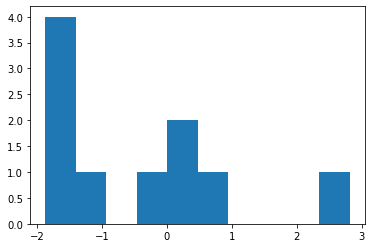

In [4]:
plt.hist(data);

#### Generate Normal Data

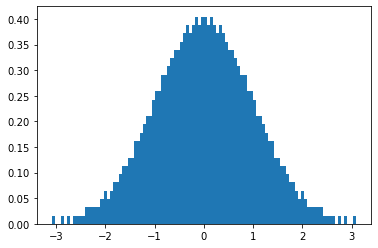

In [108]:
# thru probit function (ppf)
n = 1000
pp = np.linspace(0.001, 0.999, n)
x = st.norm.ppf(pp)
plt.hist(x, bins=100, density=True);

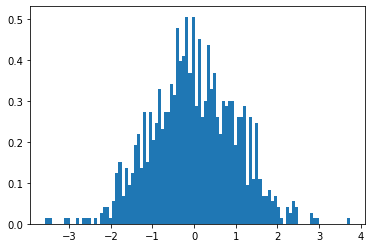

In [78]:
# thru scipy rvs
n = 1000
x = st.norm.rvs(size=n)
plt.hist(x, bins=100, density=True);

50.40674639706524 5.76436151997608


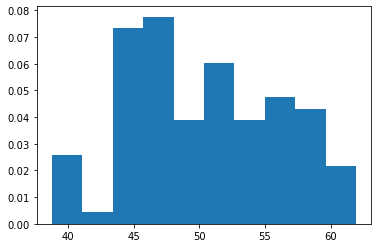

In [81]:
# thru numpy random
n = 100
x = 5*np.random.randn(n)+50
print(x.mean(), x.std())
plt.hist(x, bins=10, density=True);

[statsmodels.graphics.gofplots.qqplot](https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html)

In [67]:
from statsmodels.graphics.gofplots import qqplot

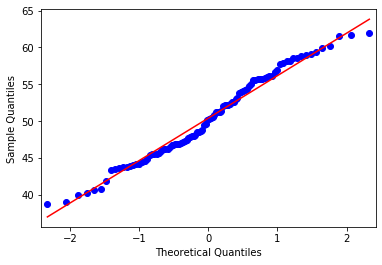

In [83]:
qqplot(x, line='s');

In [63]:
# Shapiro-Wilk Test
st.shapiro(x)

ShapiroResult(statistic=0.9879295825958252, pvalue=0.5030299425125122)

[D’Agostino’s K^2 Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html)

In [65]:
# statistic: s^2 + k^2, where s is the z-score returned by skewtest and k is the z-score returned by kurtosistest
# pvalue: a 2-sided chi squared probability for the hypothesis test
st.normaltest(x)

NormaltestResult(statistic=3.180645471806871, pvalue=0.20385980823682354)

[Anderson-Darling Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html)

In [66]:
st.anderson(x)

AndersonResult(statistic=0.36511819628309183, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [20]:
# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=0.424
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


### 2_Correlation_Tests
[Top](#Tests_)

#### 1. Pearson’s Correlation Coefficient
Assumptions
* Observations in each sample are normally distributed.

Interpretation
* H0: the two samples are independent.
* H1: there is a dependency between the samples.

In [8]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
corr_, p = pearsonr(data1, data2)
print('corr=%.3f, p=%.3f' % (corr_, p))
if p > 0.05:
    print('Probably linearly independent')
else:
    print('Probably linearly dependent')

corr=0.688, p=0.028
Probably linearly dependent


In [21]:
n = len(data1)
t = round(corr_*np.sqrt((n-2)/(1-corr_**2)), 3)
p = round((st.t.cdf(-abs(t), n-2))*2, 3)
t, p

(2.681, 0.028)

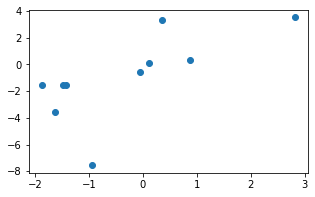

In [12]:
plt.figure(figsize=(5,3));
plt.scatter(data1, data2);

#### 2. Spearman’s Rank Correlation
This is the Pearson’s Coefficient, but for __ranked__ data.

Tests whether two samples have a __monotonic__ relationship.

Assumptions
* Observations in each sample can be ranked.

Interpretation
* H0: the two samples are independent.
* H1: there is a dependency between the samples.

In [13]:
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.855, p=0.002
Probably dependent


#### 3. Kendall’s Rank Correlation

Tests whether two samples have a __monotonic__ relationship.

Assumptions
* Observations in each sample can be ranked.

Interpretation
* H0: the two samples are independent.
* H1: there is a dependency between the samples.

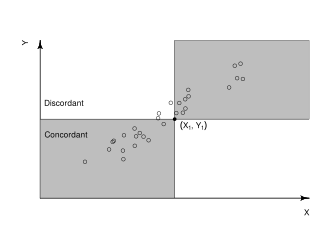
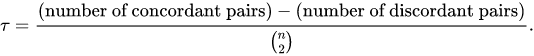

In [14]:
# Example of the Kendall's Rank Correlation Test
from scipy.stats import kendalltau
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.733, p=0.002
Probably dependent


#### 4. Chi-Squared Test

Tests whether two categorical variables are related or independent.

Assumptions
* Observations used in the calculation of the contingency table are independent.
* 25 or more examples in each cell of the contingency table.

Interpretation
* H0: the two samples are independent.
* H1: there is a dependency between the samples.

In [2]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
table = [[10, 20, 30],[6,  9,  17]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.272, p=0.873
Probably independent


In [8]:
st.chisquare([10, 20, 30, 6,  9,  17], [10.44, 18.9, 30.66, 5.57, 10.08, 16.35], ddof=3)

Power_divergenceResult(statistic=0.27152361723349366, pvalue=0.8730505608451025)

In [9]:
# dice
st.chisquare([10,10,10,5,10,15], [10,10,10,10,10,10], ddof=0)

Power_divergenceResult(statistic=5.0, pvalue=0.4158801869955079)

In [10]:
# coin
st.chisquare([60,40], [50,50], ddof=0)

Power_divergenceResult(statistic=4.0, pvalue=0.04550026389635857)

In [5]:
import random
from math import sqrt

def distance_chi_square_from_toss_coin():
    eagles = 0
    tails = 0
    # подбрасываем монету 60 раз
    for i in range(60):
        if random.randint(0,1):
            eagles += 1
        else:
            tails += 1
    # расчитываем расстояние хи-квадрат Пирсона: 
    # ((O1 - E1)|sqrt(E1))^2 + ... + ((On - En)|sqrt(En))^2
    return (
        (eagles-30)**2/30 + (tails-30)**2/30
    )
# делаем эксперимент 10 тыс.раз, 
# в каждом из которых по 60 раз будем подбрасывать монету 
# и сохранять возвращаемое значение расстояния хи-квадрат
list_of_chi_square = []
for i in range(10000):
    list_of_chi_square.append(distance_chi_square_from_toss_coin())

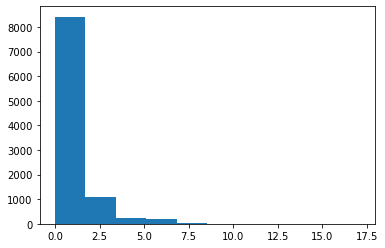

In [16]:
import random
from math import sqrt

N=10000  # num of series
k=60     # num of trials in every series
m = 2    # num of sum members (variants)
E = k/m  # expected freq
list_of_chi_square = []
for i in range(N):
    x = []
    for i in range(k):
        x.append(random.randint(0, m-1))
    chi2 = 0
    for j in range(m):
        chi2 += (x.count(j)-E)**2/E
    list_of_chi_square.append(chi2)
plt.hist(list_of_chi_square, bins=10)
plt.show()

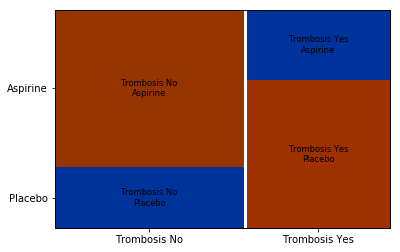

In [13]:
from statsmodels.graphics.mosaicplot import mosaic

pill_data = {
             ('Trombosis No', 'Placebo'): 7,
             ('Trombosis No', 'Aspirine'): 18,
             ('Trombosis Yes', 'Aspirine'): 6,
             ('Trombosis Yes', 'Placebo'): 13,
            }
my_plot = mosaic(pill_data, gap=.01, statistic=True)
# print(my_plot)
plt.show()

Ширина и высота каждого прямоугольника пропорциональны наблюдаемым частотам в соответствующих строках и столбцах. Цвет прямоугольника показывает величину стандартизированного остатка; если она по модулю больше 2, то прямоугольник будет полупрозрачным, если больше 4, то соответствующий прямоугольник будет закрашен. 

Если значения стандартизированных остатков больше 3х, можно считать, что в этой ячейке зафиксированы значимые отклонения.

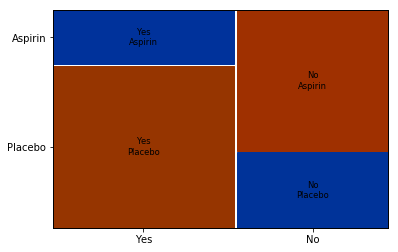

In [54]:
#воссоздадим таблицу (и подпишем строки и столбцы)
patients = pd.DataFrame({"Thrombosis": ["Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes",
                                        "Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes",
                                        "Yes","Yes","Yes","Yes","No","No","No","No","No","No","No",
                                        "No","No","No","No","No","No","No","No","No","No","No","No","No"],
                         "Group": ["Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo",
                                   "Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo",
                                   "Placebo","Placebo","Placebo","Placebo","Aspirin","Aspirin","Aspirin",
                                   "Aspirin","Aspirin","Aspirin","Placebo","Placebo","Placebo","Placebo",
                                   "Placebo","Placebo","Placebo","Aspirin","Aspirin","Aspirin","Aspirin",
                                   "Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin",
                                   "Aspirin","Aspirin"]})
#строим график
mosaic(patients, ["Thrombosis","Group"], gap=0.01, statistic=True)
plt.show()

Thrombosis  No  Yes
Group              
Aspirin     13    6
Placebo      7   18


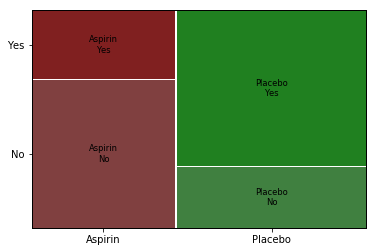

In [56]:
#посмотрим на сводную таблицу пересечения признаков
pivot = pd.pivot_table(patients, index=["Group"], columns=["Thrombosis"], aggfunc=lambda x: len(x))
print(pivot)
mosaic(pivot.stack())
plt.show()

### Fisher

In [10]:
import scipy.stats as st
# 'two-sided'
st.fisher_exact([[3,1],[1,3]])

(9.0, 0.48571428571428527)

In [13]:
st.chi2_contingency([[3,1],[1,3]])

(0.5,
 0.47950012218695337,
 1,
 array([[2., 2.],
        [2., 2.]]))

In [11]:
st.fisher_exact([[3,1],[1,3]], alternative='greater')

(9.0, 0.24285714285714263)

In [12]:
# 'such'
(st.fisher_exact([[3,1],[1,3]], alternative='greater')[1]-
st.fisher_exact([[4,0],[0,4]], alternative='greater')[1])

0.22857142857142837

In [2]:
?st.fisher_exact

Signature: st.fisher_exact(table, alternative='two-sided')
Docstring:
Perform a Fisher exact test on a 2x2 contingency table.

Parameters
----------
table : array_like of ints
    A 2x2 contingency table.  Elements should be non-negative integers.
alternative : {'two-sided', 'less', 'greater'}, optional
    Defines the alternative hypothesis.
    The following options are available (default is 'two-sided'):

      * 'two-sided'
      * 'less': one-sided
      * 'greater': one-sided

Returns
-------
oddsratio : float
    This is prior odds ratio and not a posterior estimate.
p_value : float
    P-value, the probability of obtaining a distribution at least as
    extreme as the one that was actually observed, assuming that the
    null hypothesis is true.

See Also
--------
chi2_contingency : Chi-square test of independence of variables in a
    contingency table.

Notes
-----
The calculated odds ratio is different from the one R uses. This scipy
implementation returns the (more common) 

In [1]:
import statsmodels.api as sm
import numpy as np

In [2]:
I = np.array([1,1,1])[:,np.newaxis]
V = np.array([60, 50, 75])[:,np.newaxis]
D = np.array([10,7,12])[:,np.newaxis]
mod = sm.OLS(endog=D, exog=np.concatenate((I, V), axis=1))
res = mod.fit()
res.summary()
res.params

c:\python38\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


array([-2.34210526,  0.19473684])

### 3_Stationary_Tests
[Top](#Tests_)

#### 1. Augmented Dickey-Fuller

Tests whether a time series has a unit root, e.g. has a trend or more generally is autoregressive.

Assumptions

* Observations in are temporally ordered.

Interpretation

* H0: a unit root is present (series is non-stationary).
* H1: a unit root is not present (series is stationary).

In [2]:
# Example of the Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import adfuller
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, obs, crit, t = adfuller(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably not Stationary')
else:
    print('Probably Stationary')

stat=0.517, p=0.985
Probably not Stationary


#### 2. Kwiatkowski-Phillips-Schmidt-Shin

Tests whether a time series is trend stationary or not.

Assumptions

* Observations in are temporally ordered.

Interpretation

* H0: the time series is trend-stationary.
* H1: the time series is not trend-stationary.

In [1]:
# Example of the Kwiatkowski-Phillips-Schmidt-Shin test
from statsmodels.tsa.stattools import kpss
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, crit = kpss(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Stationary')
else:
    print('Probably not Stationary')

stat=0.594, p=0.023
Probably not Stationary


### 4_Parametric_Tests
[Top](#Tests_)

#### 1. Student’s t-test

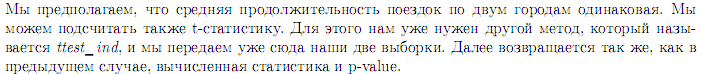

Tests whether the means of two independent samples are significantly different.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.

Interpretation

* H0: the means of the samples are equal.
* H1: the means of the samples are unequal.

In [8]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=-0.326, p=0.748
Probably the same distribution


#### 2. Paired Student’s t-test

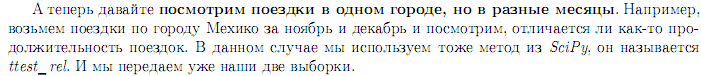

Tests whether the means of two paired samples are significantly different.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.
* Observations across each sample are paired.

Interpretation

* H0: the means of the samples are equal.
* H1: the means of the samples are unequal.

In [4]:
# Example of the Paired Student's t-test
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=-0.334, p=0.746
Probably the same distribution


#### 3. Analysis of Variance Test (ANOVA)
Tests whether the means of two or more independent samples are significantly different.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.

Interpretation

* H0: the means of the samples are equal.
* H1: one or more of the means of the samples are unequal.

In [5]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.096, p=0.908
Probably the same distribution


In [11]:
from numpy.random import randn
from scipy.stats import f_oneway
# generate three independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 50
data3 = 5 * randn(100) + 52
# compare samples
stat, p = f_oneway(data1, data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=7.788, p=0.001
Different distributions (reject H0)


#### 4. Repeated Measures ANOVA Test

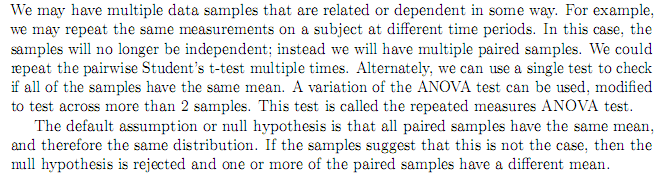

Tests whether the means of two or more paired samples are significantly different.

Assumptions

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.
* Observations across each sample are paired.

Interpretation

H0: the means of the samples are equal.
H1: one or more of the means of the samples are unequal.

Currently not supported in Python.

#### t-test mean of ONE group

In [2]:
import math
arr1 = [84.7, 105.0, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4, 93.0, 119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114.0, 95.1, 115.5, 111.5]
# arr2 = [57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7, 102.0, 69.0, 79.6, 68.9, 98.6, 76.0, 74.8, 56.0, 55.6, 69.4, 59.5]
a1 = np.array(arr1)
# a2 = np.array(arr2)
expected = (99, 70)
# scipy func
print(st.ttest_1samp(a1, popmean=expected[0]))
# compare with manual
def ttest_1samp_manual(array, popmean=100):    
    m = array.mean()
    sd = array.std(ddof=1)
    n = len(array)
    SE = sd/math.sqrt(n)
#     standard error of the mean
#     SE = st.sem(array)    
    print(f'm = {m}, sd = {sd}, n = {n}, SE = {SE}')
    t = (m-popmean)/SE
    p = (st.t.cdf(-abs(t), n-1))*2
    print(f't = {t}, pvalue = {p}')
ttest_1samp_manual(a1, expected[0])
# print(st.ttest_1samp(a2, popmean=expected[1]))
# ttest_1samp_manual(a2, expected[1])

Ttest_1sampResult(statistic=0.792165587150098, pvalue=0.4380435092551711)
m = 100.815, sd = 10.246502612573408, n = 20, SE = 2.291187637334333
t = 0.792165587150098, pvalue = 0.4380435092551711


#### t-test mean of TWO groups

In [9]:
# equal_var bool, optional
# If True (default), perform a standard independent 2 sample test that assumes equal population variances. 
# If False, perform Welch’s t-test, which does not assume equal population variance.

In [2]:
import math
arr1 = [84.7, 105.0, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4, 93.0, 119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114.0, 95.1, 115.5, 111.5]
arr2 = [57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7, 102.0, 69.0, 79.6, 68.9, 98.6, 76.0, 74.8, 56.0, 55.6, 69.4, 59.5]
a1 = np.array(arr1)
a2 = np.array(arr2)
a2 = a2*1.2
# scipy func
print(st.ttest_ind(a1, a2, equal_var=True))
# check with manual calcs
def array_stats(array):
    m = array.mean()
    sd = array.std(ddof=1)
    n = len(array)
    SE = sd/math.sqrt(n)
    return  m, sd, n, SE

def ttest_ind_manual(array1, array2, equal_var=True):    
    m1, sd1, n1, SE1 = array_stats(array1)
    m2, sd2, n2, SE2 = array_stats(array2)
    print(f'm1 = {m1:.3f}, sd1 = {sd1:.3f}, n1 = {n1}, SE1 = {SE1:.3f}')
    print(f'm2 = {m2:.3f}, sd2 = {sd2:.3f}, n2 = {n2}, SE2 = {SE2:.3f}')
    if equal_var:
        SE = math.sqrt(((n1-1)*sd1**2+(n2-1)*sd2**2)/n1+n2-2)*math.sqrt(1/n1+1/n2)
        t = (m1-m2)/SE
        p = (1-st.t.cdf(abs(t), n1+n2-2))*2
    else:
        SE = math.sqrt(SE1**2+SE2**2)
        t = (m1-m2)/SE
        p = (1-st.t.cdf(abs(t), n1+n2-2))*2
    print(f't = {t}, pvalue = {p}')
ttest_ind_manual(a1, a2, equal_var=False)

Ttest_indResult(statistic=2.0961970961329572, pvalue=0.04277742701496463)
m1 = 100.815, sd1 = 10.247, n1 = 20, SE1 = 2.291
m2 = 90.882, sd2 = 18.550, n2 = 20, SE2 = 4.148
t = 2.0961970961329572, pvalue = 0.042777427014964564


In [6]:
import math
arr1 = [84.7, 105.0, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4, 93.0, 119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114.0, 95.1, 115.5, 111.5]
arr2 = [57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7, 102.0, 69.0, 79.6, 68.9, 98.6, 76.0, 74.8, 56.0, 55.6, 69.4, 59.5]
a1 = np.array(arr1)
a2 = np.array(arr2)
a2 = a2*1.2
# scipy func
print(st.ttest_ind(a1, a2, equal_var=True))
# check with manual calcs
def array_stats(array):
    m = array.mean()
    sd = array.std(ddof=1)
    n = len(array)
    SE = sd/math.sqrt(n)
    return  m, sd, n, SE

def ttest_ind_manual(array1, array2, equal_var=True):    
    m1, sd1, n1, SE1 = array_stats(array1)
    m2, sd2, n2, SE2 = array_stats(array2)
    print(f'm1 = {m1:.3f}, sd1 = {sd1:.3f}, n1 = {n1}, SE1 = {SE1:.3f}')
    print(f'm2 = {m2:.3f}, sd2 = {sd2:.3f}, n2 = {n2}, SE2 = {SE2:.3f}')
    if equal_var:
        SE = math.sqrt(((n1-1)*sd1**2+(n2-1)*sd2**2)/n1+n2-2)*math.sqrt(1/n1+1/n2)
        t = (m1-m2)/SE
        p = (1-st.t.cdf(abs(t), n1+n2-2))*2
    else:
        SE = math.sqrt(SE1**2+SE2**2)
        t = (m1-m2)/SE
        p = (1-st.t.cdf(abs(t), n1+n2-2))*2
    print(f't = {t}, pvalue = {p}')
ttest_ind_manual(a1, a2, equal_var=True)

Ttest_indResult(statistic=2.0961970961329572, pvalue=0.04277742701496463)
m1 = 100.815, sd1 = 10.247, n1 = 20, SE1 = 2.291
m2 = 90.882, sd2 = 18.550, n2 = 20, SE2 = 4.148
t = 1.4896409615358104, pvalue = 0.1445725169854859


### 5_Nonparametric_Tests
[Top](#Tests_)

#### 1. U-test, Mann-Whitney

In [4]:
# example of the mann-whitney u test
from numpy.random import seed
from numpy.random import rand
from scipy.stats import mannwhitneyu
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 50 + (rand(100) * 10)
data2 = 51 + (rand(100) * 10)
# compare samples
stat, p = mannwhitneyu(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=4077.000, p=0.012
Different distribution (reject H0)


In [3]:
arr1 = [84.7, 105.0, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4, 93.0, 119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114.0, 95.1, 115.5, 111.5]
arr2 = [57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7, 102.0, 69.0, 79.6, 68.9, 98.6, 76.0, 74.8, 56.0, 55.6, 69.4, 59.5]
a1 = np.array(arr1)
a2 = np.array(arr2)*1.2
print(st.mannwhitneyu(a1, a2, use_continuity=True, alternative='two-sided'))

MannwhitneyuResult(statistic=275.0, pvalue=0.04387048531699071)


#### 2. Wilcoxon Signed-Rank Test

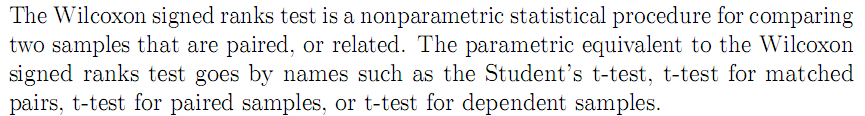

In [5]:
# example of the wilcoxon signed-rank test
from numpy.random import seed
from numpy.random import rand
from scipy.stats import wilcoxon
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 50 + (rand(100) * 10)
data2 = 51 + (rand(100) * 10)
# compare samples
stat, p = wilcoxon(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=1937.000, p=0.043
Different distribution (reject H0)


#### 3. Kruskal-Wallis H Test

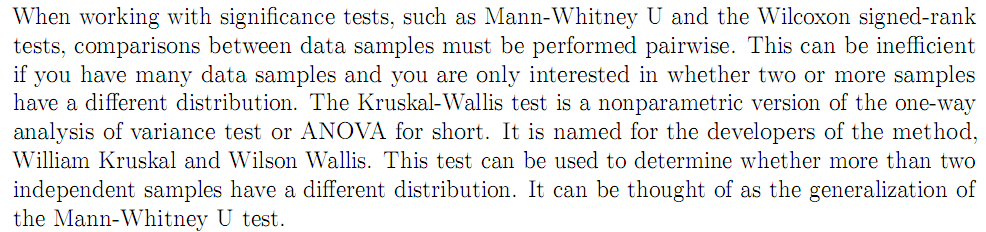

In [6]:
# example of the kruskal-wallis h-test
from numpy.random import seed
from numpy.random import rand
from scipy.stats import kruskal
# seed the random number generator
seed(1)
# generate three independent samples
data1 = 50 + (rand(100) * 10)
data2 = 51 + (rand(100) * 10)
data3 = 52 + (rand(100) * 10)
# compare samples
stat, p = kruskal(data1, data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=34.747, p=0.000
Different distributions (reject H0)


#### 4. Friedman Test

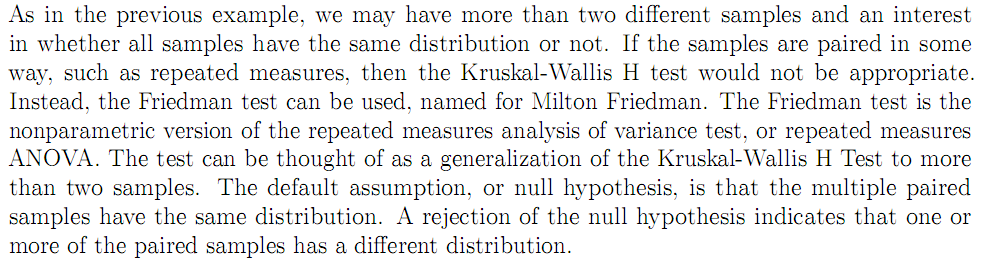
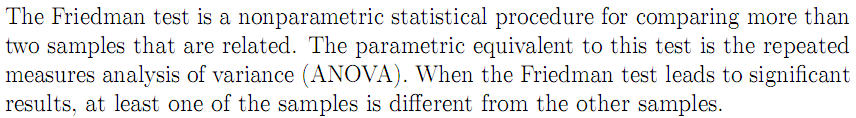

In [7]:
# example of the friedman test
from numpy.random import seed
from numpy.random import rand
from scipy.stats import friedmanchisquare
# seed the random number generator
seed(1)
# generate three independent samples
data1 = 50 + (rand(100) * 10)
data2 = 51 + (rand(100) * 10)
data3 = 52 + (rand(100) * 10)
# compare samples
stat, p = friedmanchisquare(data1, data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=36.240, p=0.000
Different distributions (reject H0)


### 6_Power_analysis
[Top](#Tests_)

The `Statsmodels` library provides the __TTestIndPower__ class for calculating a power analysis
for the Student's t-test with independent samples. Of note is the __TTestPower__ class that can
perform the same analysis for the paired Student's t-test. The function __solve power()__ can be
used to calculate one of the four parameters in a power analysis. In our case, we are interested in
calculating the sample size. We can use the function by providing the three pieces of information
we know (__alpha__, __effect__, and __power__) and setting the size of argument we wish to calculate the
answer of (__nobs1__) to None. This tells the function what to calculate.

A note on sample size: the function has an argument called __ratio__ that is the ratio of the
number of samples in one sample to the other. If both samples are expected to have the same
number of observations, then the ratio is 1.0. If, for example, the second sample is expected to
have half as many observations, then the ratio would be 0.5. The __TTestIndPower__ instance must
be created, then we can call the __solve power()__ with our arguments to estimate the sample size
for the experiment.

In [27]:
# estimate sample size via power analysis
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect = 0.8
alpha = 0.05
power = 0.8
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 25.525


We can go one step further and calculate power curves. Power curves are line plots that
show how the change in variables, such as effect size and sample size, impact the power of the
statistical test.

The __plot power()__ function can be used to create power curves. The dependent variable (x-
axis) must be specified by name in the __dep var__ argument. Arrays of values can then be specified
for the sample size (__nobs__), effect size (__effect size__), and significance (__alpha__) parameters. One
or multiple curves will then be plotted showing the impact on statistical power. For example,
we can assume a significance of 0.05 (the default for the function) and explore the change in
sample size between 5 and 100 with low, medium, and high effect sizes.

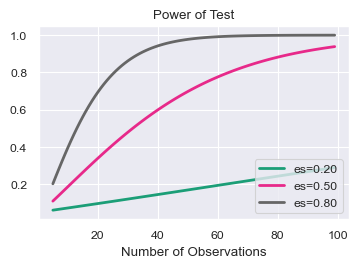

In [26]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.2, 0.5, 0.8])
sample_sizes = array(range(5, 100))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

### 7_Heteroscedasticity
[Top](#Tests_)

In [14]:
d = pd.read_csv(r'states.csv')
d.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


In [22]:
# Regression residuals
d['pov_res'] = d.poverty - 64.8 + 0.62*d.hs_grad

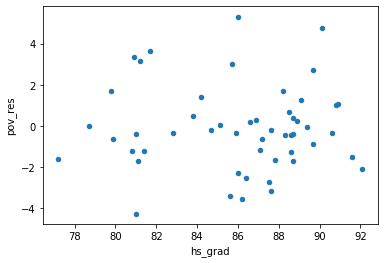

In [23]:
d.plot.scatter('hs_grad','pov_res');

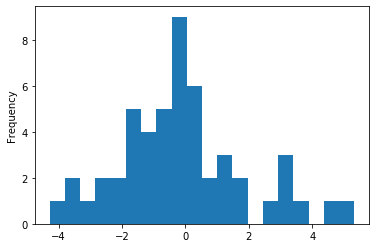

In [24]:
d.pov_res.plot.hist(bins=20);

#### [Goldfeld-Quandt Test](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D1%81%D1%82_%D0%93%D0%BE%D0%BB%D0%B4%D1%84%D0%B5%D0%BB%D0%B4%D0%B0_%E2%80%94_%D0%9A%D1%83%D0%B0%D0%BD%D0%B4%D1%82%D0%B0)

In [26]:
from statsmodels.stats.diagnostic import het_goldfeldquandt
F_statistic, p_value, alternative = het_goldfeldquandt(d.poverty, d[['hs_grad']])
print(F_statistic, p_value)
if p_value > 0.05:
    print('residuals are homoscedastic')
else:
    print('residuals are heteroscedastic')

0.7926693970830331 0.7140436177623026
residuals are homoscedastic


[Top](#Tests_)